In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding, Dense

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # 맨 위 층만 마지막 출력을 반환합니다.
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


### IMDB 영화 리뷰 분류 문제 적용

In [ ]:
from keras.datasets import imdb
from keras_preprocessing import sequence

max_features=10000 # 특성으로 사용할 단어의 수
maxlen=500
batch_size=32

print('데이터 불러오기')
(input_train, y_train), (input_test, y_test)=imdb.load_data(num_words=max_features)
print(len(input_train), '학습용 시퀀스')
print(len(input_test), '검증용 시퀀스')

# 문장에서 maxlen 이후의 단어는 pad_sequences() 함수로 슬라이싱
# 문장 길이가 maxlen보다 작으면 부족한 부분을 0으로

print('시퀀스 패딩(samples x time)')
input_train=sequence.pad_sequences(input_train, maxlen=maxlen)
input_test=sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train의 크기', input_train.shape)
print('input_test의 크기', input_test.shape)

데이터 불러오기
25000 학습용 시퀀스
25000 검증용 시퀀스
시퀀스 패딩(samples x time)
input_train의 크기 (25000, 500)
input_test의 크기 (25000, 500)


### Embedding 층과 SimpleRNN 층을 이용해 간단한 순환 네트워크 구축

In [ ]:
from keras.layers import Dense

model=Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history=model.fit(input_train, y_train, epochs=30, batch_size=128, validation_split=.2)

Epoch 1/30
157/157 [==============================] - 22s 140ms/step - loss: 0.6643 - acc: 0.5807 - val_loss: 0.5399 - val_acc: 0.7380
Epoch 2/30
157/157 [==============================] - 21s 135ms/step - loss: 0.4159 - acc: 0.8192 - val_loss: 0.4323 - val_acc: 0.8064
Epoch 3/30
157/157 [==============================] - 21s 135ms/step - loss: 0.2939 - acc: 0.8831 - val_loss: 0.3872 - val_acc: 0.8494
Epoch 4/30
157/157 [==============================] - 21s 136ms/step - loss: 0.2271 - acc: 0.9129 - val_loss: 0.4966 - val_acc: 0.7760
Epoch 5/30
157/157 [==============================] - 22s 138ms/step - loss: 0.1641 - acc: 0.9395 - val_loss: 0.5100 - val_acc: 0.7570
Epoch 6/30
157/157 [==============================] - 22s 138ms/step - loss: 0.1155 - acc: 0.9607 - val_loss: 0.4568 - val_acc: 0.8364
Epoch 7/30
157/157 [==============================] - 22s 140ms/step - loss: 0.0728 - acc: 0.9771 - val_loss: 0.5073 - val_acc: 0.8392
Epoch 8/30
157/157 [==============================] - 2

In [ ]:
import matplotlib.pyplot as plt

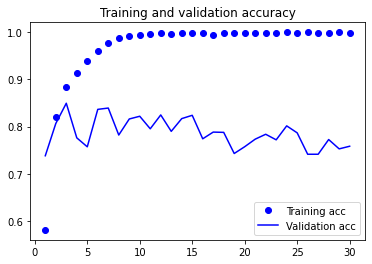

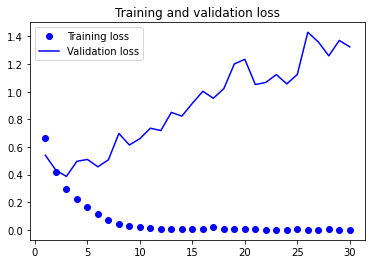

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()